# ch02 퍼셉트론

## 2.1 퍼셉트론 이란?

<p>
퍼셉트론은 다수의 신호를입력으로 받아 하나의 신호를 출력한다.</br>
퍼셉트온 신호는 '흐른다/안 흐른다.(1이나 0)'의 두가지 값을 가질 수 있다.
</p>


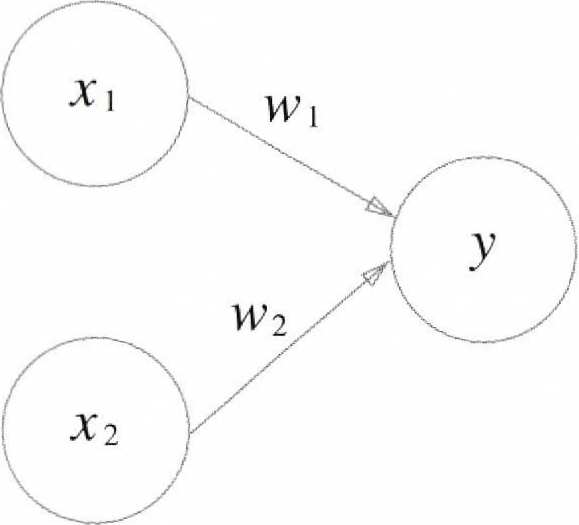

입력으로 두개의 신호를 받은 퍼셉트론

x1과 x2는 입력신호, y는 출력신호, w1과 w2는 가중치를 의미한다.</br>
그림에 있는 하나의 원을 **뉴런** 또는 **노드** 라고 부른다.</br>
입력신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다.(w1x1,w2x2)</br>
</br>
뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다(뉴런이 활성화 한다.)</br>
뉴런의 한계는 임계값(threshold)라고 하며, $\theta$ 로 나타낸다.

$$y = \begin{cases}0&(w_{1}*x_{1} + w_{2}*x_{2}\leq{\theta})\\1 &(w_{1}*x{1} + w_{2}*x_{2}>{\theta})\end{cases}$$

퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다.

## 2.2 단순한 논리회로